# MSHRM dataset results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import seaborn as sns

import sys
sys.path.append('../helpers')
from main_loop import setup_experiment, run_experiment

2024-10-15 14:03:54.827247: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Constants

In [2]:
DATA_NAME = "MSHRM_data"  # labels: poisonous=0, edible=1

EPSILON = 0.1
GRID_STEP = 0.01
ORIGINAL_SAMPLE_COUNT = {0: 324}  # resample class 0 to create a 1:9 imbalance

TF_SEED = 1

## Set up the experiment

Data loaded: ./../data/MSHRM_data.pickle
Done preparing grid: (16800000, 2)


NCMs for labels:   0%|          | 0/2 [00:00<?, ?it/s]

NCMs for labels:   0%|          | 0/2 [00:00<?, ?it/s]

p-values for labels:   0%|          | 0/2 [00:00<?, ?it/s]

dict_keys(['grid_arrays', 'grid_points', 'ps_grid', 'X_train', 'y_train', 'X_test', 'y_test', 'X_prop', 'y_prop', 'X_calib', 'y_calib'])

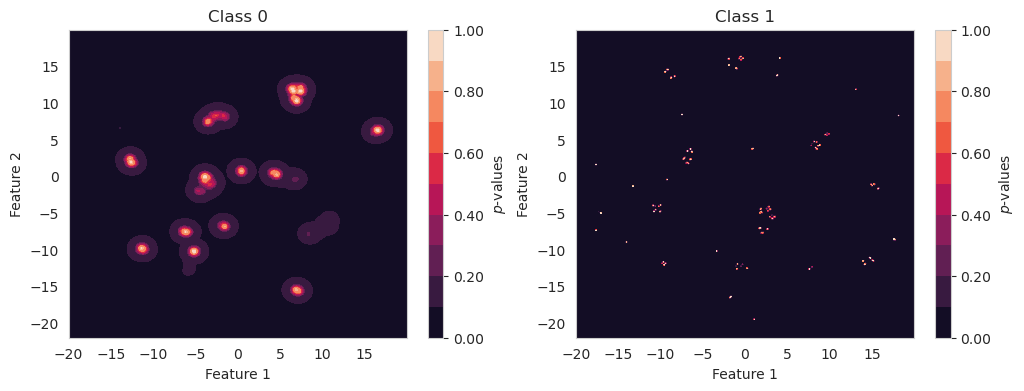

In [3]:
setup_dict = setup_experiment(DATA_NAME, grid_step=GRID_STEP, nr_train_samples=ORIGINAL_SAMPLE_COUNT, prop_size=0.6)
setup_dict.keys()

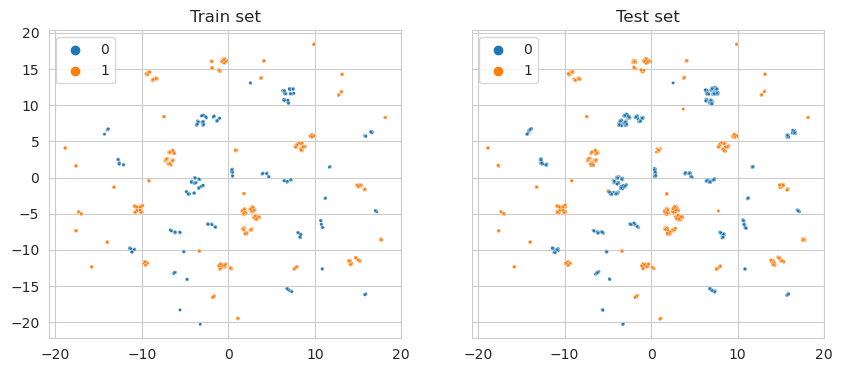

In [4]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.scatterplot(x=setup_dict['X_train'][:, 0], y=setup_dict['X_train'][:, 1], hue=setup_dict['y_train'], palette="tab10", s=5, ax=axs[0])
axs[0].set_title("Train set")
sns.scatterplot(x=setup_dict['X_test'][:, 0], y=setup_dict['X_test'][:, 1], hue=setup_dict['y_test'], palette="tab10", s=5, ax=axs[1])
axs[1].set_title("Test set")

plt.legend()
plt.show()

## Original samples result

In [5]:
run_experiment(setup_dict, is_original=True, tf_seed=TF_SEED)

2024-10-15 14:04:32.886971: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.




Baseline results: ORIGINAL
84/84 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1292
           1       0.52      1.00      0.68      1389

    accuracy                           0.52      2681
   macro avg       0.26      0.50      0.34      2681
weighted avg       0.27      0.52      0.35      2681



## Extended sample results

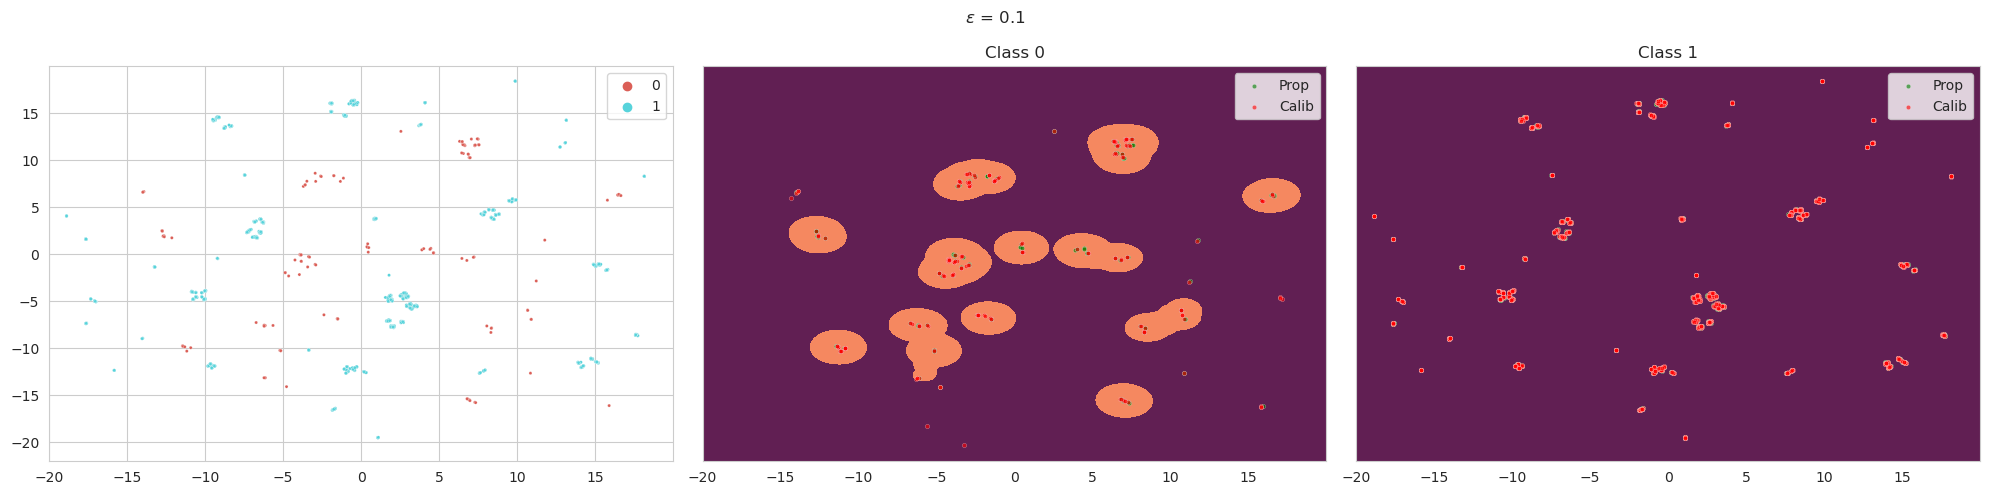

Synthetic samples per class
Label 0: (1658057, 2)
Label 1: (30383, 2)


Total synthetic samples: (1688440, 2)
ORIGINAL + SYNTHETIC
84/84 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1292
           1       0.96      0.92      0.94      1389

    accuracy                           0.94      2681
   macro avg       0.94      0.94      0.94      2681
weighted avg       0.94      0.94      0.94      2681



In [6]:
run_experiment(setup_dict, is_o_s=True, epsilon=EPSILON, tf_seed=TF_SEED)